# New York Bike Trips

##### This notebook aims to analyse bike trips from a bike rental company during may month in 2018. 
The dataset orgins from Kaggle: https://www.kaggle.com/gabrielramos87/bike-trips

Following questions will be analyzed: 
- What is the age distribution of customers? 
- What is the distribution between women and men, and age?
- What is the trip duration distribution? 
- What is the ration between subscribers and customers?
- Mapping out ten most popular and ten most unpopular start stations
- When during the month are the bikes being rented?

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statistics as stat

In [225]:
df = pd.read_csv('New York Citibike Trips.csv')

In [226]:
df.head()

,start_time,stop_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,bike_id,gender,age,trip_duration
0,2018-05-31 23:59:59,2018-06-01 00:12:57,312,Allen St & Stanton St,460,S 4 St & Wythe Ave,Subscriber,25805,male,32,12.97
1,2018-05-31 23:59:59,2018-06-01 00:12:26,401,Allen St & Rivington St,360,William St & Pine St,Subscriber,17258,male,24,12.45
2,2018-05-31 23:59:51,2018-06-01 00:08:09,483,E 12 St & 3 Ave,368,Carmine St & 6 Ave,Subscriber,19692,male,39,8.28
3,2018-05-31 23:59:48,2018-06-01 00:07:33,3107,Bedford Ave & Nassau Ave,3076,Scholes St & Manhattan Ave,Subscriber,28285,male,28,7.75
4,2018-05-31 23:59:45,2018-06-01 00:07:48,3341,Central Park West & W 102 St,3400,E 110 St & Madison Ave,Subscriber,21000,female,51,8.05


In [227]:
df.tail()

,start_time,stop_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,bike_id,gender,age,trip_duration
1595329,2018-05-01 00:01:00,2018-05-01 00:08:02,3493,E 118 St & 3 Ave,3351,E 102 St & 1 Ave,Subscriber,30645,male,32,7.02
1595330,2018-05-01 00:00:43,2018-05-01 00:05:40,532,S 5 Pl & S 5 St,3096,Union Ave & N 12 St,Subscriber,16980,male,33,4.95
1595331,2018-05-01 00:00:40,2018-05-01 00:08:03,3263,Cooper Square & Astor Pl,546,E 30 St & Park Ave S,Subscriber,27255,male,49,7.38
1595332,2018-05-01 00:00:35,2018-05-01 00:12:16,507,E 25 St & 2 Ave,3458,W 55 St & 6 Ave,Subscriber,29357,male,22,11.67
1595333,2018-05-01 00:00:11,2018-05-01 00:05:14,491,E 24 St & Park Ave S,2003,1 Ave & E 18 St,Subscriber,32191,male,34,5.05


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595334 entries, 0 to 1595333
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   start_time          1595334 non-null  object 
 1   stop_time           1595334 non-null  object 
 2   start_station_id    1595334 non-null  int64  
 3   start_station_name  1595334 non-null  object 
 4   end_station_id      1595334 non-null  int64  
 5   end_station_name    1595334 non-null  object 
 6   user_type           1595334 non-null  object 
 7   bike_id             1595334 non-null  int64  
 8   gender              1595334 non-null  object 
 9   age                 1595334 non-null  int64  
 10  trip_duration       1595334 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 133.9+ MB


In [229]:
df.describe()

,start_station_id,end_station_id,bike_id,age,trip_duration
count,1.595334e+06,1.595334e+06,1.595334e+06,1.595334e+06,1.595334e+06
mean,1.548185e+03,1.537103e+03,2.620161e+04,3.785808e+01,1.643375e+01
std,1.427931e+03,1.426690e+03,5.784637e+03,1.102715e+01,2.848633e+02
min,7.200000e+01,7.200000e+01,1.452900e+04,1.600000e+01,1.020000e+00
25%,3.800000e+02,3.790000e+02,2.062600e+04,2.900000e+01,6.120000e+00
50%,5.020000e+02,5.010000e+02,2.786500e+04,3.500000e+01,1.027000e+01
75%,3.232000e+03,3.232000e+03,3.102600e+04,4.600000e+01,1.767000e+01
max,3.686000e+03,3.686000e+03,3.369000e+04,6.500000e+01,1.117817e+05


In [230]:
df.columns

Index(['start_time', 'stop_time', 'start_station_id', 'start_station_name',
       'end_station_id', 'end_station_name', 'user_type', 'bike_id', 'gender',
       'age', 'trip_duration'],
      dtype='object')

In [231]:
max(df['age'])

65

In [232]:
min(df['age'])

16

In [233]:
stat.mean(df['age'])

37.85808300957668

#### What is the age distribution of customers? 

Text(0.5, 0, 'Age')

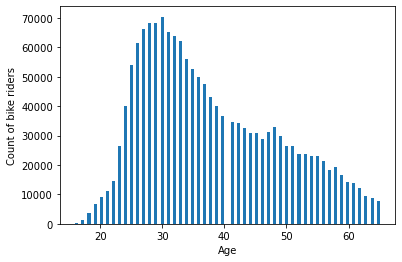

In [234]:
plt.hist(df['age'], density = False, bins = 100)
plt.ylabel('Count of bike riders')
plt.xlabel('Age')

Users between age 25-35 are most common. Most of the users are 30 years old.

#### What is the distribution between women and men, and age?

In [235]:
age_groups = pd.cut(df['age'], bins=[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
df.groupby(age_groups)['gender'].count()

age
(15, 20]     21282
(20, 25]    146382
(25, 30]    335036
(30, 35]    300082
(35, 40]    217350
(40, 45]    163395
(45, 50]    149737
(50, 55]    120225
(55, 60]     89698
(60, 65]     52147
(65, 70]         0
Name: gender, dtype: int64

In [236]:
df2 = pd.crosstab(age_groups, df['gender'])

In [237]:
df2['age'] = df['age'].astype(object)

In [238]:
df2 = df2.drop(columns = 'age')

In [239]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 10 entries, (15, 20] to (60, 65]
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   female  10 non-null     int64
 1   male    10 non-null     int64
dtypes: int64(2)
memory usage: 946.0 bytes


In [240]:
df2.head()

gender,female,male
age,,
"(15, 20]",5235,16047
"(20, 25]",45317,101065
"(25, 30]",98640,236396
"(30, 35]",79659,220423
"(35, 40]",49131,168219


Text(0, 0.5, 'Number of customers')

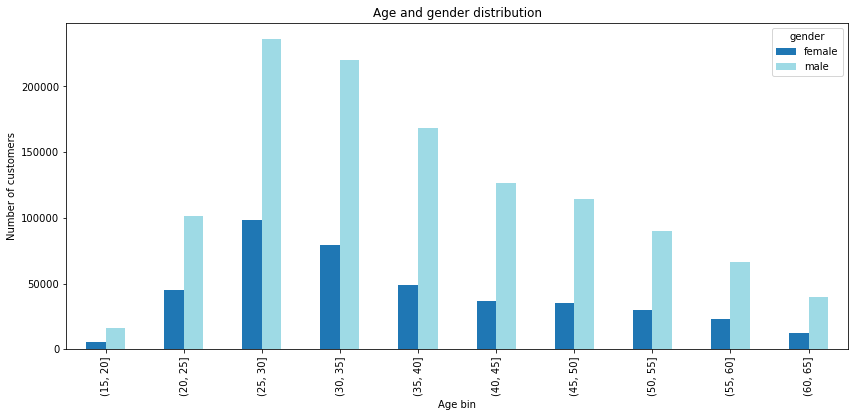

In [241]:
df2.plot(kind = 'bar', stacked = False, figsize=(14,6), colormap='tab20')
plt.title('Age and gender distribution')
plt.xlabel('Age bin')
plt.ylabel('Number of customers')

#### What is the trip duration distribution? 

In [242]:
df['trip_duration_rounded'] = df['trip_duration'].round()

In [243]:
df['trip_duration_rounded'] = df['trip_duration_rounded'].astype(int)

In [244]:
df['trip_duration_rounded'].max()

111782

In [245]:
df_trip = df.groupby(['trip_duration_rounded', 'gender']).trip_duration_rounded.count().unstack()

In [246]:
df_trip = df_trip.dropna()

In [247]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 1 to 1380
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   female  381 non-null    float64
 1   male    381 non-null    float64
dtypes: float64(2)
memory usage: 8.9 KB


Text(0, 0.5, 'Number of customers')

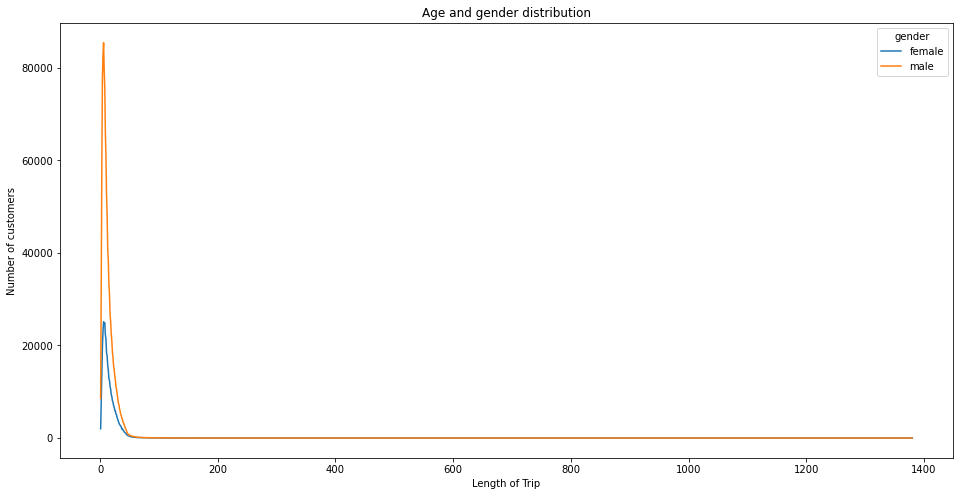

In [248]:
df_trip.plot(kind = 'line', figsize=(16,8))
plt.title('Age and gender distribution')
plt.xlabel('Length of Trip')
plt.ylabel('Number of customers')

I would like to know more about the trips that are longer than 50 minutes. My theory is that some of these customer have forgotten to stop the renting of the bikes. This makes me cuyrios about the pricing model of the business.

In [249]:
df_trip = df_trip.reset_index()

In [250]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_duration_rounded  381 non-null    int64  
 1   female                 381 non-null    float64
 2   male                   381 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.1 KB


In [251]:
df_trip_1 = df_trip[df_trip['trip_duration_rounded'] < 50]

In [252]:
df_trip_1 = df_trip_1.set_index('trip_duration_rounded')

Text(0, 0.5, 'Number of trips')

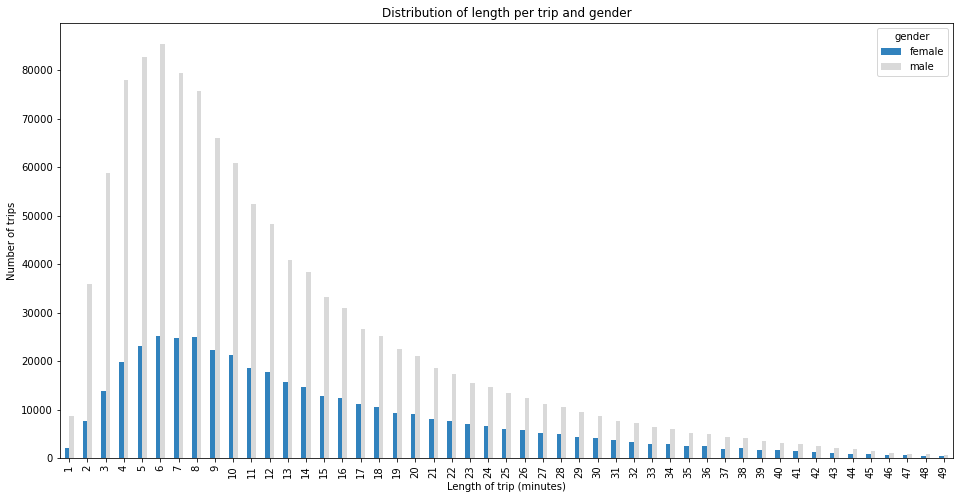

In [253]:
df_trip_1.plot(kind = 'bar', figsize=(16,8), colormap = 'tab20c')
plt.title('Distribution of length per trip and gender')
plt.xlabel('Length of trip (minutes)')
plt.ylabel('Number of trips')

Most common length of a bikeride is between 6-8 minutes.

#### What is the ration between subscribers and customers?

In [254]:
no_user_type = df['user_type'].value_counts()
print(no_user_type)

Subscriber    1521005
Customer        74329
Name: user_type, dtype: int64


In [255]:
percent_user_type = df['user_type'].value_counts(normalize=True)
print(percent_user_type)

Subscriber    0.953409
Customer      0.046591
Name: user_type, dtype: float64


95% of users are subsribers, the rest are customers

#### Mapping out ten most popular and ten most unpopular start stations

In [256]:
df.columns

Index(['start_time', 'stop_time', 'start_station_id', 'start_station_name',
       'end_station_id', 'end_station_name', 'user_type', 'bike_id', 'gender',
       'age', 'trip_duration', 'trip_duration_rounded'],
      dtype='object')

In [257]:
df_loc = df.iloc[: , [2, 3, 4, 5]].copy()
df_loc.head()

,start_station_id,start_station_name,end_station_id,end_station_name
0,312,Allen St & Stanton St,460,S 4 St & Wythe Ave
1,401,Allen St & Rivington St,360,William St & Pine St
2,483,E 12 St & 3 Ave,368,Carmine St & 6 Ave
3,3107,Bedford Ave & Nassau Ave,3076,Scholes St & Manhattan Ave
4,3341,Central Park West & W 102 St,3400,E 110 St & Madison Ave


In [258]:
df_start = df_loc['start_station_id'].value_counts().sort_values(ascending=False).to_frame()
df_start = df_start.reset_index()
df_start = df_start.rename(columns={'index': 'start_station_id', 'start_station_id': 'start_stations_count'})
df_start_pop = df_start.head(10)
df_start_pop

,start_station_id,start_stations_count
0,519,15504
1,435,11329
2,402,10339
3,492,10259
4,497,9867
5,426,9735
6,477,9471
7,462,9141
8,285,8740
9,379,8527


In [259]:
df_start_rare = df_start.tail(15)
df_start_rare

,start_station_id,start_stations_count
751,3394,92
752,3564,89
753,3559,89
754,3512,87
755,3557,85
756,3685,69
757,3683,59
758,3432,56
759,3333,54
760,3325,49


In [260]:
df_end = df_loc['end_station_id'].value_counts().sort_values(ascending=False).to_frame()
df_end = df_end.reset_index()
df_end = df_end.rename(columns={'index': 'end_station_id', 'end_station_id': 'end_stations_count'})
df_end = df_end.head(10)
df_end

,end_station_id,end_stations_count
0,519,15524
1,435,11459
2,402,11060
3,492,10762
4,426,10695
5,497,9905
6,477,9426
7,462,9176
8,285,8896
9,379,8640


In [261]:
df_start_stations = df_loc.iloc[: , [0,1]].copy()
df_start_stations.head()

,start_station_id,start_station_name
0,312,Allen St & Stanton St
1,401,Allen St & Rivington St
2,483,E 12 St & 3 Ave
3,3107,Bedford Ave & Nassau Ave
4,3341,Central Park West & W 102 St


In [262]:
df_start_pop_merged = pd.merge(df_start_pop, df_start_stations, on='start_station_id', how='left')
df_start_pop_merged = df_start_pop_merged.drop_duplicates().reset_index(drop=True)
df_start_pop_merged

,start_station_id,start_stations_count,start_station_name
0,519,15504,Pershing Square North
1,435,11329,W 21 St & 6 Ave
2,402,10339,Broadway & E 22 St
3,492,10259,W 33 St & 7 Ave
4,497,9867,E 17 St & Broadway
5,426,9735,West St & Chambers St
6,477,9471,W 41 St & 8 Ave
7,462,9141,W 22 St & 10 Ave
8,285,8740,Broadway & E 14 St
9,379,8527,W 31 St & 7 Ave


In [263]:
df_start_rare_merged = pd.merge(df_start_rare, df_start_stations, on='start_station_id', how='left')
df_start_rare_merged = df_start_rare_merged.drop_duplicates().reset_index(drop=True)

In [264]:
df_coord_pop = pd.DataFrame([('Pershing Square North', 40.7519669, -73.9777869 ),
                        ('W 21 St & 6 Ave', 40.753554, -73.985042),
                        ('Broadway & E 22 St', 40.738005, -73.98325),
                        ('W 33 St & 7 Ave', 40.750992, -73.990623),
                        ('E 17 St & Broadway', 40.734230041503906, -73.98348999023438), 
                        ('West St & Chambers St', 40.7173697, -74.0125425),
                        ('W 41 St & 8 Ave', 40.759164, -73.988391),
                        ('W 22 St & 10 Ave', 40.742143, -74.008204),                         
                        ('Broadway & E 14 St', 40.727433, -73.973291),
                        ('W 31 St & 7 Ave', 40.750992, -73.990623)],
                       columns=('start_station_name', 'lat', 'long'))

df_coord_rare = pd.DataFrame([('Columbia St & W 9 St', 40.734134,-73.999188),
                        ('21 St & 36 Ave', 40.750056,-73.984184),
                        ('21 St & 38 Ave', 40.750331,-73.981056),
                        ('27 Ave & 4 St', 40.7727287,-73.9271196),
                        ('40 Ave & 9 St', 40.753079,-73.93717),
                        ('Prospect Park - 5 Year Anniversary Celebration', 40.6617743, -73.971089),
                        ('Smart Cities Conference', 40.7101013, -73.9861753),
                        ('Columbia St & Lorraine St', 40.674454, -74.007355 ),
                        ('E 95 St & 3 Ave', 40.7849079, -73.9507545), 
                        ('Bressler', 40.714269, -74.005973)],
                       columns=('start_station_name', 'lat', 'long'))

print(df_coord_pop)
print(df_coord_rare)

      start_station_name        lat       long
0  Pershing Square North  40.751967 -73.977787
1        W 21 St & 6 Ave  40.753554 -73.985042
2     Broadway & E 22 St  40.738005 -73.983250
3        W 33 St & 7 Ave  40.750992 -73.990623
4     E 17 St & Broadway  40.734230 -73.983490
5  West St & Chambers St  40.717370 -74.012542
6        W 41 St & 8 Ave  40.759164 -73.988391
7       W 22 St & 10 Ave  40.742143 -74.008204
8     Broadway & E 14 St  40.727433 -73.973291
9        W 31 St & 7 Ave  40.750992 -73.990623
                               start_station_name        lat       long
0                            Columbia St & W 9 St  40.734134 -73.999188
1                                  21 St & 36 Ave  40.750056 -73.984184
2                                  21 St & 38 Ave  40.750331 -73.981056
3                                   27 Ave & 4 St  40.772729 -73.927120
4                                   40 Ave & 9 St  40.753079 -73.937170
5  Prospect Park - 5 Year Anniversary Celebration  

In [265]:
df_start_pop_coord_merged = pd.merge(df_start_pop_merged, df_coord_pop, on='start_station_name', how='left')
df_start_pop_coord_merged

,start_station_id,start_stations_count,start_station_name,lat,long
0,519,15504,Pershing Square North,40.751967,-73.977787
1,435,11329,W 21 St & 6 Ave,40.753554,-73.985042
2,402,10339,Broadway & E 22 St,40.738005,-73.983250
3,492,10259,W 33 St & 7 Ave,40.750992,-73.990623
4,497,9867,E 17 St & Broadway,40.734230,-73.983490
5,426,9735,West St & Chambers St,40.717370,-74.012542
6,477,9471,W 41 St & 8 Ave,40.759164,-73.988391
7,462,9141,W 22 St & 10 Ave,40.742143,-74.008204
8,285,8740,Broadway & E 14 St,40.727433,-73.973291
9,379,8527,W 31 St & 7 Ave,40.750992,-73.990623


In [266]:
df_start_rare_coord_merged = pd.merge(df_start_rare_merged, df_coord_rare, on='start_station_name', how='left')
df_start_rare_coord_merged = df_start_rare_coord_merged.dropna()

In [267]:
import folium
from folium import plugins
import ipywidgets
import branca
import branca.colormap as cm

In [268]:
map_bikes = folium.Map(location=[40.7127281, -74.0060152], zoom_start = 12)

for i in range(0,len(df_start_pop_coord_merged)):
    folium.Circle(
    location=[df_start_pop_coord_merged.iloc[i]['lat'], df_start_pop_coord_merged.iloc[i]['long']],
    popup = df_start_pop_coord_merged.iloc[i]['start_station_name'],
    radius = 200,
    fill = True,
    color='blue',
    fill_opacity=0.2
    ).add_to(map_bikes)

for i in range(0,len(df_start_rare_coord_merged)):
    folium.Circle(
    location=[df_start_rare_coord_merged.iloc[i]['lat'], df_start_rare_coord_merged.iloc[i]['long']],
    popup = df_start_rare_coord_merged.iloc[i]['start_station_name'],
    radius = 200,
    fill = True,
    color='red',
    fill_opacity=0.2
    ).add_to(map_bikes)

map_bikes

Red dots indicate the least popular starting and ending stations, and blue dots indicate most popular starting and ending stations.

#### When during the day are bikes being rented?

In [269]:
df['hour'] = df['start_time'].str[10:13]
df.head()

,start_time,stop_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,bike_id,gender,age,trip_duration,trip_duration_rounded,hour
0,2018-05-31 23:59:59,2018-06-01 00:12:57,312,Allen St & Stanton St,460,S 4 St & Wythe Ave,Subscriber,25805,male,32,12.97,13,23
1,2018-05-31 23:59:59,2018-06-01 00:12:26,401,Allen St & Rivington St,360,William St & Pine St,Subscriber,17258,male,24,12.45,12,23
2,2018-05-31 23:59:51,2018-06-01 00:08:09,483,E 12 St & 3 Ave,368,Carmine St & 6 Ave,Subscriber,19692,male,39,8.28,8,23
3,2018-05-31 23:59:48,2018-06-01 00:07:33,3107,Bedford Ave & Nassau Ave,3076,Scholes St & Manhattan Ave,Subscriber,28285,male,28,7.75,8,23
4,2018-05-31 23:59:45,2018-06-01 00:07:48,3341,Central Park West & W 102 St,3400,E 110 St & Madison Ave,Subscriber,21000,female,51,8.05,8,23


In [270]:
df_hour = df.groupby(['hour', 'gender']).hour.count().unstack()
df_hour

gender,female,male
hour,,
00,2575,11064
01,1245,6325
02,629,3729
03,396,2178
04,530,2295
05,2415,8621
06,9123,30320
07,21584,63063
08,39434,106059


Text(0, 0.5, 'Number of trips')

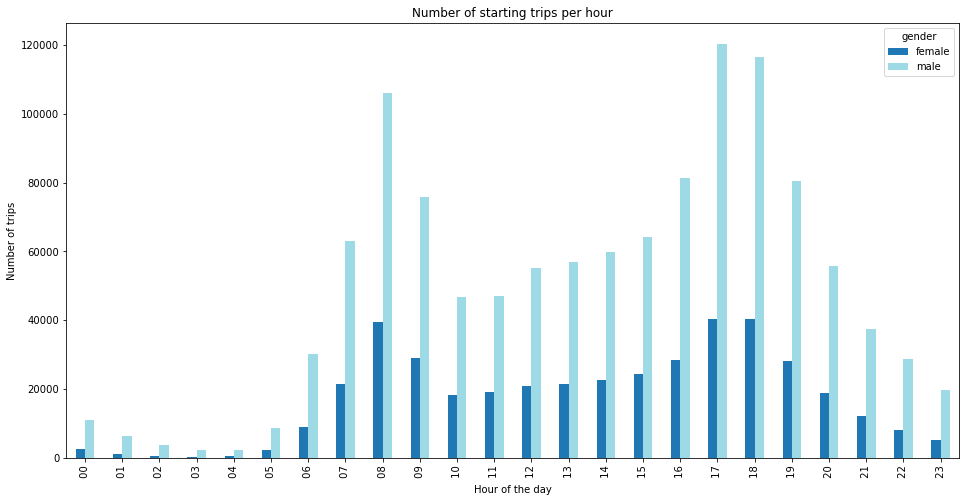

In [271]:
df_hour.plot(kind = 'bar', figsize=(16,8), colormap = 'tab20')
plt.title('Number of starting trips per hour')
plt.xlabel('Hour of the day')
plt.ylabel('Number of trips')

#### When during the month are the bikes being rented?

In [272]:
df['date'] = df['start_time'].str[8:11]
df.head()

,start_time,stop_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,bike_id,gender,age,trip_duration,trip_duration_rounded,hour,date
0,2018-05-31 23:59:59,2018-06-01 00:12:57,312,Allen St & Stanton St,460,S 4 St & Wythe Ave,Subscriber,25805,male,32,12.97,13,23,31
1,2018-05-31 23:59:59,2018-06-01 00:12:26,401,Allen St & Rivington St,360,William St & Pine St,Subscriber,17258,male,24,12.45,12,23,31
2,2018-05-31 23:59:51,2018-06-01 00:08:09,483,E 12 St & 3 Ave,368,Carmine St & 6 Ave,Subscriber,19692,male,39,8.28,8,23,31
3,2018-05-31 23:59:48,2018-06-01 00:07:33,3107,Bedford Ave & Nassau Ave,3076,Scholes St & Manhattan Ave,Subscriber,28285,male,28,7.75,8,23,31
4,2018-05-31 23:59:45,2018-06-01 00:07:48,3341,Central Park West & W 102 St,3400,E 110 St & Madison Ave,Subscriber,21000,female,51,8.05,8,23,31


In [273]:
df_date = df.groupby(['date', 'gender']).date.count().unstack()
df_date = df_date.reset_index()

Text(0, 0.5, 'Number of trips')

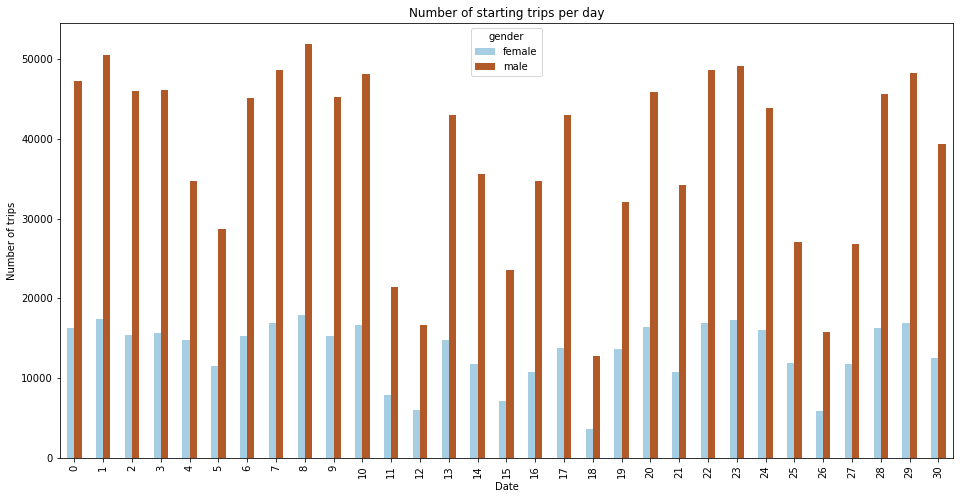

In [274]:
df_date.plot(kind = 'bar', figsize=(16,8), colormap = 'Paired')
plt.title('Number of starting trips per day')
plt.xlabel('Date')
plt.ylabel('Number of trips')

In may 2018, the dates 5, 12, 19, 26 are Saturdays. We can se that the number of bike rentals decreases during the weekend. 

#### Testing Plotly

In [275]:
import plotly.express as px

In [276]:
fig = px.bar(df_date, x='date', y=['female', 'male'], title='Number of starting trips per day', 
             labels={'variable':'gender'})
fig.show()
